# Общие советы по библиотеке Matplotlib

## Импорт matplotlib

Аналогично тому, как мы использовали сокращение np для библиотеки NumPy и сокращение pd для библиотеки Pandas, мы будем применять стандартные сокращения для импортов библиотеки Matplotlib:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Чаще всего мы будем использовать интерфейс plt.

## Настройка стилей

Для выбора подходящих стилей для наших графиков мы будем применять директиву plt.style. В следующем фрагменте кода мы задаем директиву classic, которая обеспечит в создаваемых нами графиках классический стиль библиотеки Matplotlib:

In [2]:
plt.style.use('seaborn-deep')

В данном разделе мы будем настраивать этот стиль по мере необходимости. Обратите внимание, что таблицы стилей поддерживаются версией 1.5 библиотеки Matplotlib. В более ранних версиях доступен только стиль по умолчанию. 

## Использовать show() или не использовать? Как отображать свои графики?

Визуализация, которую не видно, особой пользы не несет, но то, в каком виде вы увидите графики библиотеки Matplotlib, зависит от контекста. Имеется три возможных контекста:
- использование Matplotlib в сценарии;
- в терминале оболочки IPython;
- в блокноте IPython.

### Построение графиков из сценария

Функция plt.show()будет полезна при использовании библиотеки Matplotlib изнутри сценария. Она запускает цикл ожидания события, ищет все активные в настоящий момент объекты графиков и открывает одно или несколько интерактивных окон для отображения вашего графика (графиков).

Допустим, у вас имеется файл myplot.py (Exam).

Можно запустить этот сценарий из командной строки, что приведет к открытию окна с вашим графиком.

Команда plt.show() выполняет «под капотом» много разной работы, так как ей необходимо взаимодействовать с интерактивной графической прикладной частью вашей системы. Детали этой операции различаются в зависимости от операционной системы и конкретной версии, но библиотека Matplotlib делает все возможное, чтобы скрыть от вас эти детали.

Одно важное замечание: команду plt.show() следует использовать только один раз за сеанс работы с Python, и чаще всего ее можно увидеть в самом конце сценария. Выполнение нескольких команд show() может привести к непредсказуемому поведению в зависимости от прикладной части, так что лучше избегать этого.

### Построение графиков из командной оболочки IPython

Очень удобно использовать Matplotlib интерактивно из командной оболочки IPython. Оболочка IPython будет отлично работать с библиотекой Matplotlib, если перевести ее в режим Matplotlib. Для активизации этого режима после запуска IPython можно воспользоваться «магической» командой %matplotlib:

In [3]:
%matplotlib

Using matplotlib backend: TkAgg


In [4]:
import matplotlib.pyplot as plt

После любая команда plot приведет к открытию окна графика с возможностью выполнения дальнейших команд для его изменения. Некоторые изменения (например, модификация свойств уже нарисованных линий) не будут отрисовываться автоматически. Чтобы добиться этого, воспользуйтесь командой plt.draw(). Выполнять команду plt.show() в режиме Matplotlib не обязательно.

### Построение графиков из блокнота IPython

Блокнот IPython — браузерный интерактивный инструмент для анализа данных, допускающий совмещение комментариев, кода, графики, элементов HTML и многого другого в единый исполняемый документ

Интерактивное построение графиков в блокноте IPython возможно с помощью команды %matplotlib, работает аналогично командной оболочке IPython. В блокноте IPython у вас появляется возможность включения графики непосредственно в блокнот с двумя возможными альтернативами:
- использование команды %matplotlib notebook приведет к включению в блокнот интерактивных графиков;
- выполнение команды %matplotlib inline приведет к включению в блокнот статических изображений графиков.

После выполнения этой команды (которое нужно произвести только один раз за сеанс/для одного ядра Python) все создающие графики блоки в блокноте будут включать PNG-изображения итогового графика:

In [5]:
%matplotlib inline
import numpy as np

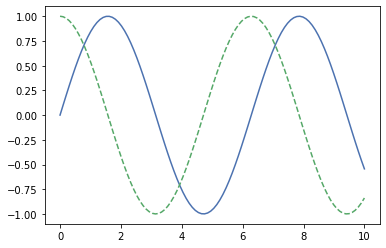

In [6]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Сохранение рисунков в файл

Умение сохранять рисунки в файлы различных форматов — одна из возможностей библиотеки Matplotlib. Например, сохранить предыдущий рисунок в файл PNG можно с помощью команды savefig():

In [7]:
fig.savefig(r'Fig\my_figure.png')

Чтобы убедиться, что содержимое этого файла соответствует нашим ожиданиям, воспользуемся объектом Image оболочки IPython для отображения его содержимого:

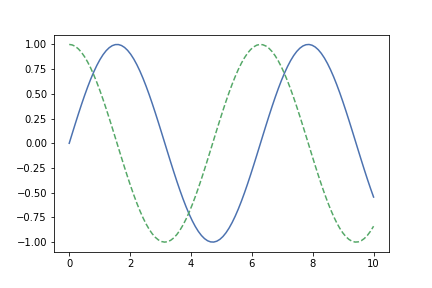

In [8]:
from IPython.display import Image
Image(r'Fig\my_figure.png')

Команда savefig() определяет формат файла, исходя из расширения заданного имени файла. В зависимости от установленной в вашей системе прикладной части может поддерживаться множество различных форматов файлов. Вывести список поддерживаемых форматов файлов для вашей системы вы можете с помощью следующего метода объекта canvas рисунка:

In [9]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

Обратите внимание, что при сохранении рисунка не обязательно использовать команду plt.show() или другие команды, обсуждавшиеся ранее.

## Два интерфейса по цене одного

Два интерфейса библиотеки Matplotlib (удобный MATLAB-подобный интерфейс, основанный на сохранении состояния, и обладающий большими возможностями объектно-ориентированный интерфейс) — свойство, которое потенциально может привести к путанице. Рассмотрим вкратце различия между ними.

### Интерфейс в стиле MATLAB

Библиотека Matplotlib изначально была написана как альтернативный вариант (на языке Python) для пользователей пакета MATLAB, и значительная часть ее синтаксиса отражает этот факт. MATLAB-подобные инструменты содержатся в интерфейсе pyplot (plt). Например, следующий код, вероятно, выглядит довольно знакомо пользователям MATLAB:

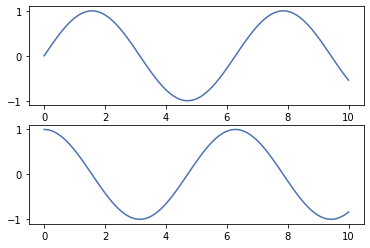

In [15]:
plt.figure() # создаем рисунок для графика

# создаем первую из двух областей графика и задаем текущую ось
plt.subplot(2, 1, 1) # (строки, столбцы, номер панели)
plt.plot(x, np.sin(x))

# создаем вторую область и задаем текущую ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Важно отметить, что этот интерфейс сохраняет состояние: он отслеживает текущий рисунок и его оси координат и для него выполняет все команды plt. Получить на них ссылки можно с помощью команд plt.gcf() (от англ. get current figure — «получить текущий рисунок») и plt.gca() (от англ. get current axes — «получить текущие оси координат»).

Хотя в случае простых графиков этот интерфейс с сохранением состояния быстр и удобен, его использование может привести к проблемам. Например, как после создания второй области рисунка вернуться в первую и добавить что-либо в ней. Сделать это в MATLAB-подобном интерфейсе можно, но довольно громоздким способом. Существует лучший вариант.

### Объектно-ориентированный интерфейс

Объектно-ориентированный интерфейс подходит для более сложных ситуаций, когда вам требуется больше возможностей управления рисунком. В объектно-ориентированном интерфейсе функции рисования не полагаются на понятие текущего рисунка или осей, а являются методами явным образом определяемых объектов Figure и Axes. Чтобы перерисовать предыдущий рисунок с его помощью, можно сделать следующее:

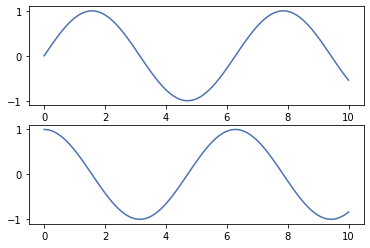

In [21]:
# сначала создаем сетку графиков
# ax будет массивом из двух объектов Axes
fig, ax = plt.subplots(2)

# вызываем метод plot() соответствующего объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

В случае более простых графиков выбор интерфейса в основном вопрос личных предпочтений, но по мере усложнения графиков объектно-ориентированный подход становится необходимостью. В этой главе мы будем переключаться между MATLAB-подобным и объектно-ориентированным интерфейсами в зависимости от того, какой из них удобнее для конкретной задачи. В большинстве случаев в коде приходится всего лишь заменить plt.plot() на ax.plot() и не более того, но есть несколько нюансов, на которые мы будем обращать внимание в следующих разделах.